In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<b>11.1</b> A computer was used to generate four random numbers from a normal distribution
with a set mean and variance: 1.1650, .6268, .0751, .3516. Five more random
normal numbers with the same variance but perhaps a different mean were then
generated (the mean may or may not actually be different): .3035, 2.6961, 1.0591,
2.7971, 1.2641.

a. What do you think the means of the random normal number generators were?
What do you think the difference of the means was?

In [2]:
a = [1.1650, .6268, .0751, .3516]
b = [.3035, 2.6961, 1.0591, 2.7971, 1.2641]
print("Mean of first set", mean(a))
print("Mean of second set", mean(b))
print("difference of the means:", mean(b)-mean(a))

Mean of first set 0.554625
Mean of second set 1.62398
difference of the means: 1.069355


b. What do you think the variance of the random number generator was?

<b>We will use the pooled sample variance for this calculation:</b>

$$s^2_p = \frac {(n − 1)s_X^2 + (m − 1)s_Y^2}{m + n − 2}$$

<b>where</b> 

$$s_X^2 = \frac 1 {n-1} \sum (X_i - \bar{X})^2$$

In [3]:
s_p_squared = (sum((a-mean(a))**2) + sum((b-mean(b))**2))/7
s_p_squared

0.76669321935714285

c. What is the estimated standard error of your estimate of the difference of the
means?

<b>The estimated standard deviation (or standard error) of $\bar{X} − \bar{Y}$ is</b>

$$s_{\bar{X} - \bar{Y}} = s_p \sqrt{\frac 1 n + \frac 1 m }$$

In [4]:
est_std_error = sqrt(s_p_squared)*sqrt(1/4 + 1/5)
est_std_error

0.58737717755349861

d. Form a 90% confidence interval for the difference of the means of the random
number generators.

<b>Under the assumptions of Theorem A, a 100(1 − α)% confidence interval for $μ_X − μ_Y$ is</b>

$$(\bar{X} − \bar{Y} ) ± t_{m+n−2} (α/2)s_{\bar{X} −\bar{Y}}$$

In [5]:
from scipy.stats import t, norm
print((mean(a)-mean(b))-t.ppf(0.95,7)*est_std_error, (mean(a)-mean(b))+t.ppf(0.95,7)*est_std_error)

-2.18218723369 0.0434772336942


e. In this situation, is it more appropriate to use a one-sided test or a two-sided
test of the equality of the means?

<b>We should use a two-sided test because we are not told before hand that one of the populations is assumed to be bigger.</b>

f. What is the p-value of a two-sided test of the null hypothesis of equal means?

In [6]:
2*(1- t.cdf((-mean(a)+mean(b))/est_std_error,7))

0.11147715012477799

g. Would the hypothesis that the means were the same versus a two-sided alter-
native be rejected at the significance level α = .1?

<b> We would not reject the null hypothesis</b>

h. Suppose you know that the variance of the normal distribution was σ^2 = 1.
How would your answers to the preceding questions change?


In [43]:
print((mean(a)-mean(b))-norm.ppf(0.95)*sqrt(1/4+1/5), (mean(a)-mean(b))+norm.ppf(0.95)*sqrt(1/4+1/5))
2*norm.cdf((mean(a)-mean(b))/sqrt(1/4+1/5))

-2.17275635687 0.0340463568702


0.11091356845433901

<b>According to my calculations. Our conclusions would remain the same</b>

<b>11.2</b> The difference of the means of two normal distributions with equal variance is to
be estimated by sampling an equal number of observations from each distribution.
If it were possible, would it be better to halve the standard deviations of the
populations or double the sample sizes?
 
 
<b>We would like to minimize the standard error:</b>

$$s_{\bar{X} - \bar{Y}} = s_p \sqrt{\frac 2 n}$$

<b>Clearly then, if we halve the standard deviation, the standard error will also be halved. However, if we double the sample size, we have only made the standard error go down by a factor of $\sqrt{2}$. Therefore it would be better to halve the standard deviation.</b>

<b>11.3</b> In Section 11.2.1, we considered two methods of estimating Var(X − Y ). Under
the assumption that the two population variances were equal, we estimated this
quantity by

$$s^2_p (\frac 1 n + \frac 1 m)$$

and without this assumption by

$$\frac {s_X^2} n + \frac {s_Y^2} m$$

Show that these two estimates are identical if m = n.
 
$$s^2_p (\frac 1 n + \frac 1 n) = \frac {(n-1) (s_X^2 +s_Y^2) }{2(n-1)}(\frac 2 n) = \frac {s_X^2 +s_Y^2} n $$

<b>Which is the same as $\frac {s_X^2} n + \frac {s_Y^2} m$ when $n=m$</b>

<b>11.8</b> An experiment to determine the efficacy of a drug for reducing high blood pressure
is performed using four subjects in the following way: two of the subjects are
chosen at random for the control group and two for the treatment group. During
the course of treatment with the drug, the blood pressure of each of the subjects in
the treatment group is measured for ten consecutive days as is the blood pressure
of each of the subjects in the control group.

a. In order to test whether the treatment has an effect, do you think it is appropriate
to use the two-sample t test with n = m = 20?

<b>No. n and m refer to independent and identically distributed samples. Because there is only four people, we cannot say that these samples are i.i.d.</b>

b. Do you think it is appropriate to use the Mann-Whitney test with n = m = 20?

<b>Again no, for the same reasons. The Mann-Whitney test should be used on two populations that each have i.i.d. samples.</b>
 

<b>11.15</b> Suppose that n measurements are to be taken under a treatment condition and
another n measurements are to be taken independently under a control condition. It is thought that the standard deviation of a single observation is about 10
under both conditions. How large should n be so that a 95% confidence interval for $μ_X − μ_Y$ has a width of 2? Use the normal distribution rather than the t
distribution, since n will turn out to be rather large.

In [8]:
from scipy.stats import norm
from scipy.optimize import minimize
def minimize_this(n):
    return (2 - 2*norm.ppf(0.975, scale = 10 )*sqrt(2/n))**2 #squared error gives good results
minimize(minimize_this, 10)['x']

array([ 766.74525712])

<b>Therefore we would need 767 measurements</b>

<b>11.16</b> Referring to Problem 15, how large should n be so that the test of $H_0 : μ_X = μ_Y$
against the one-sided alternative $H_A : μ_X > μ_Y$ has a power of .5 if $μ_X − μ_Y = 2$
and α = .10?

<b>power $= \mathbb{P}(\text{reject } H_0 |\mu_X - \mu_Y = 2)$ </b>

We reject $H_0$ when $\frac{\bar{X} - \bar{Y}}{10 \sqrt{2/n}} > z(0.1)$

$$\rightarrow ~~ \mathbb{P} \left[\frac {(\bar{X} - \bar{Y}) - \Delta}{10 \sqrt{2/n}} > z(0.1) - \frac 2 {10 \sqrt{2n}}\right]$$

In [9]:
def power(n):
    return (0.5 -(1 - norm.cdf(norm.ppf(0.9) - 1/(5*sqrt(2/n)))))**2

minimize(power, 100)['x']

array([ 82.19927393])

<b>Therefore we would need 83 measurements</b>

<b>11.19</b> An experiment is planned to compare the mean of a control group to the mean
of an independent sample of a group given a treatment. Suppose that there are to
be 25 samples in each group. Suppose that the observations are approximately
normally distributed and that the standard deviation of a single measurement in
either group is σ = 5.

a. What will the standard error of $\bar{Y} − \bar{X}$ be?

$$\text{squared standard error} = \frac {s_X^2} n + \frac {s_Y^2} m = \frac {25}{25}+ \frac {25}{25} = 2$$

<b>Therefore the standard error is $\sqrt{2}$.</b>

b. With a significance level α = .05, what is the rejection region of the test of
the null hypothesis $H_0 : μ_Y = μ_X$ versus the alternative $H_A : μ_Y > μ_X$ ?

In [10]:
norm.ppf(0.95)*sqrt(2)

2.3261743073533476

<b>Therefore, if $\bar{Y} - \bar{X}$ is larger than 2.326, we will reject the null hypothesis.

c. What is the power of the test if $μ_Y = μ_X + 1$?

In [11]:
1 - norm.cdf(1.326, scale = sqrt(2))

0.17421894148057504

d. Suppose that the p-value of the test turns out to be 0.07. Would the test reject
at significance level α = .10?

<b>Yes, the p-value is smaller than the significance level</b>

e. What is the rejection region if the alternative is $H_A : μ_Y \neq μ_X$ ? What is the
power if $μ_Y = μ_X + 1$?
 

In [12]:
print("Rejection region : ", -norm.ppf(0.975)*sqrt(2), norm.ppf(0.975)*sqrt(2))

Rejection region :  -2.7718076487 2.7718076487


In [13]:
(1 - norm.cdf(3.77, scale = sqrt(2)) + norm.cdf(-1.77, scale = sqrt(2)) )

0.10920200825334478

<b>11.32</b> If $X ∼ N (μ_X , σ_X^2 )$ and Y is independent $N (μ_Y , σ_Y^2 )$, what is π = P(X < Y ) in
terms of $μ_X , μ_Y , σ_X$ , and $σ_Y$ ? 

$$\pi = \mathbb{P}(X < Y) = \mathbb{P}(X - Y < 0)$$

<b>Because the sum of normal random variables is also normal, we have<b>

$$X-Y \sim N[\mu_X - \mu_Y, σ_X^2 + σ_Y^2 ]$$

<b>and therefore,</b>

$$\frac {(X-\mu_X) - (Y - \mu_Y)}{\sqrt {σ_X^2 + σ_Y^2 }} \sim N[0, 1]$$

<b>Using this, we have</b>

$$\pi = \mathbb{P}(X < Y) = \mathbb{P}(X - Y < 0) = \mathbb{P}\left(\frac {(X-\mu_X) - (Y - \mu_Y)}{\sqrt {σ_X^2 + σ_Y^2 }} < \frac {\mu_Y - \mu_X}{\sqrt {σ_X^2 + σ_Y^2 }}\right)  = \Phi(\frac {\mu_Y - \mu_X}{\sqrt {σ_X^2 + σ_Y^2 }})$$

<b>Where $\Phi$ is the cdf of the standard normal</b>

<b>11.34</b> This problem contrasts the power functions of paired and unpaired designs. Graph
and compare the power curves for testing $H_0 : μ_X = μ_Y$ for the following two
designs.

a. Paired: $\text{Cov}(X_i , Y_i ) = 50, σ_X = σ_Y = 10, i = 1, . . . , 25$.

<b>We know that:</b>

$$\mathbb{E}[ \bar{D}] = \mu_X - \mu_Y , ~~~~~~~~ \text{Var}[\bar{D}] = \frac 1 n ( σ_X^2 + σ_Y^2 - 2 σ_{XY} )$$

$$\text{Var}[\bar{D}] = \frac 1 {25} ( 100 + 100 - 100 ) = 4$$

<b>Therefore,</b>

$$\text{power} = \mathbb{P}[\bar{D}>2z(\alpha/2)] + \mathbb{P}[\bar{D}< - 2z(\alpha/2)]$$

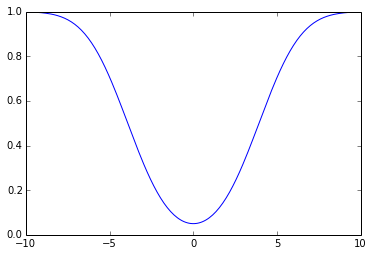

In [51]:
def this_power(mu):
    return norm.cdf(-1.96*2, loc = mu, scale = 2) + 1 - norm.cdf(1.96*2, loc = mu, scale = 2)
x = linspace(-10,10,200)
plot(x, this_power(x));

b. Unpaired: $X_1 , . . . , X_{25}$ and $Y_1 , . . . , Y_{25}$ are independent with variance as in
part (a).

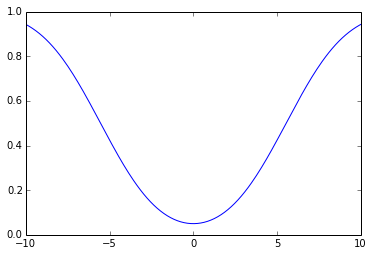

In [53]:
def this_power(mu):
    return norm.cdf(-1.96*sqrt(8), loc = mu, scale = sqrt(8))\
    + 1 - norm.cdf(1.96*sqrt(8), loc = mu, scale = sqrt(8))
x = linspace(-10,10,200)
plot(x, this_power(x));

<b>11.39</b> An experiment was done to test a method for reducing faults on telephone lines
(Welch 1987). Fourteen matched pairs of areas were used. The following table
shows the fault rates for the control areas and for the test areas:

<table>
<tr><td>Test</td><td>Control</td></tr>
<tr><td>676</td><td>88</td></tr>
<tr><td>206</td><td>570</td></tr>
<tr><td>230</td><td>605</td></tr>
<tr><td>256</td><td>617</td></tr>
<tr><td>280</td><td>653</td></tr>
<tr><td>433</td><td>2913</td></tr>
<tr><td>337</td><td>924</td></tr>
<tr><td>466</td><td>286</td></tr>
<tr><td>497</td><td>1098</td></tr>
<tr><td>512</td><td>982</td></tr>
<tr><td>794</td><td>2346</td></tr>
<tr><td>428</td><td>321</td></tr>
<tr><td>452</td><td>615</td></tr>
<tr><td>512</td><td>519</td></tr>


</table>

a. Plot the differences versus the control rate and summarize what you see.

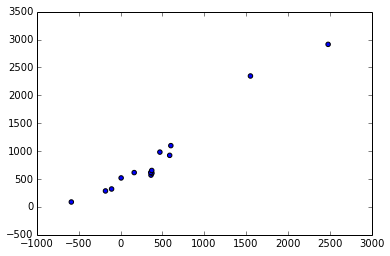

In [55]:
test = array([676,206,230,256,280,433,337,466,497,512,794,428,452,512])
control = array([88,570,605,617,653,2913,924,286,1098,982,2346,321,615,519])
difference = control -test
scatter(difference, control);


<b>It looks like there is a strong degree of correlation</b>

b. Calculate the mean difference, its standard deviation, and a confidence interval.

In [63]:
print(cov(test,control))

[[  28007.25824176   39339.11538462]
 [  39339.11538462  624945.80769231]]


In [73]:
print("mean differnece", mean(control)-mean(test))
est_std_error = sqrt((var(test, ddof = 1) + var(control, ddof=1) - 2*39339.1154)/len(test))
print("estimated std. error", est_std_error)
print((mean(difference))-t.ppf(0.975,2*(len(test)-1))*est_std_error,\
      (mean(difference))+t.ppf(0.975,2*(len(test)-1))*est_std_error)

mean differnece 461.285714286
estimated std. error 202.533037011
44.9730944113 877.59833416


c. Calculate the median difference and a confidence interval and compare to the
previous result.

In [71]:
median(difference)

368.5

In [72]:
n = len(test)
sigma = sqrt(n*n*(2*n+1)/12)
print(sigma)
print((median(difference))-t.ppf(0.95,2*(n-1))*sigma,\
      (median(difference))+t.ppf(0.95,2*(n-1))*sigma)

21.7638844572
331.379128666 405.620871334


d. Do you think it is more appropriate to use a t test or a nonparametric method to
test whether the apparent difference between test and control could be due to
chance? Why? Carry out both tests and compare.

In [19]:
from scipy.stats import rankdata
print(difference)
ranked = rankdata(abs(difference))
signed_rank = [ranked[i] if difference[i]>0 else -ranked[i] for i in range(len(difference))]
signed_rank

[  588  -364  -375  -361  -373 -2480  -587   180  -601  -470 -1552   107
  -163    -7]


[11.0,
 -6.0,
 -8.0,
 -5.0,
 -7.0,
 -14.0,
 -10.0,
 4.0,
 -12.0,
 -9.0,
 -13.0,
 2.0,
 -3.0,
 -1.0]

In [20]:
W_plus = 11 + 4  + 2
W_plus


17

<b>Looking at table 9, we have </b>
<table>
<tr><td>.025</td><td>.01</td><td>.005</td></tr>
<tr><td>21</td><td>16</td><td>13</td></tr>
</table>
<b>Therefore we reject at the .025 confidence level</b>